# Mini Dollar Strategy - Backtesting and Optimization

This notebook demonstrates:
1. Strategy backtesting
2. Performance analysis
3. Parameter optimization
4. Results visualization

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from itertools import product

from src.agents.coordinator import StrategyCoordinator
from src.reporting.performance import PerformanceAnalyzer

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_palette('Set2')

## 1. Initial Strategy Test

In [2]:
# Initialize components
coordinator = StrategyCoordinator(db_path="../src/data/database/candles.db")
analyzer = PerformanceAnalyzer()

# Run backtest
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

results = coordinator.backtest(
    start_date=start_date.strftime('%Y-%m-%d'),
    end_date=end_date.strftime('%Y-%m-%d'),
    interval=5  # 5 minutos
)

# Get performance metrics
metrics = analyzer.calculate_metrics(results)
print("\nPerformance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

2024-12-04 09:43:16.133 | INFO     | src.analysis.technical.strategy:__init__:25 - Initialized TechnicalStrategy with RSI=14, MA_Fast=9, MA_Slow=21
2024-12-04 09:43:16.134 | INFO     | src.agents.market:__init__:31 - Initialized MarketAgent with balance=100000
2024-12-04 09:43:16.135 | INFO     | src.agents.coordinator:__init__:40 - Initialized StrategyCoordinator
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:88: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['open'] = df['open'].resample(rule).first()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:89: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['high'] = df['high'].resample(rule).max()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:90: FutureWarning: 'T' is 


Performance Metrics:
total_trades: 28.00
winning_trades: 8.00
losing_trades: 6.00
win_rate: 0.29
total_profit: 198.15
average_profit: 7.08
profit_std: 75.45
max_profit: 110.44
max_loss: -121.24
sharpe_ratio: -11.77
max_drawdown: -0.00


## 2. Detailed Performance Analysis

Trading Strategy Performance Report
Generated on: 2024-12-04 09:43:34

Performance Metrics:
Total Trades: 28
Win Rate: 28.57%
Total Profit: 198.15
Average Profit per Trade: 7.08
Maximum Drawdown: -0.40%
Sharpe Ratio: -11.77

Trade Statistics:
Winning Trades: 8
Losing Trades: 6
Best Trade: 110.44
Worst Trade: -121.24


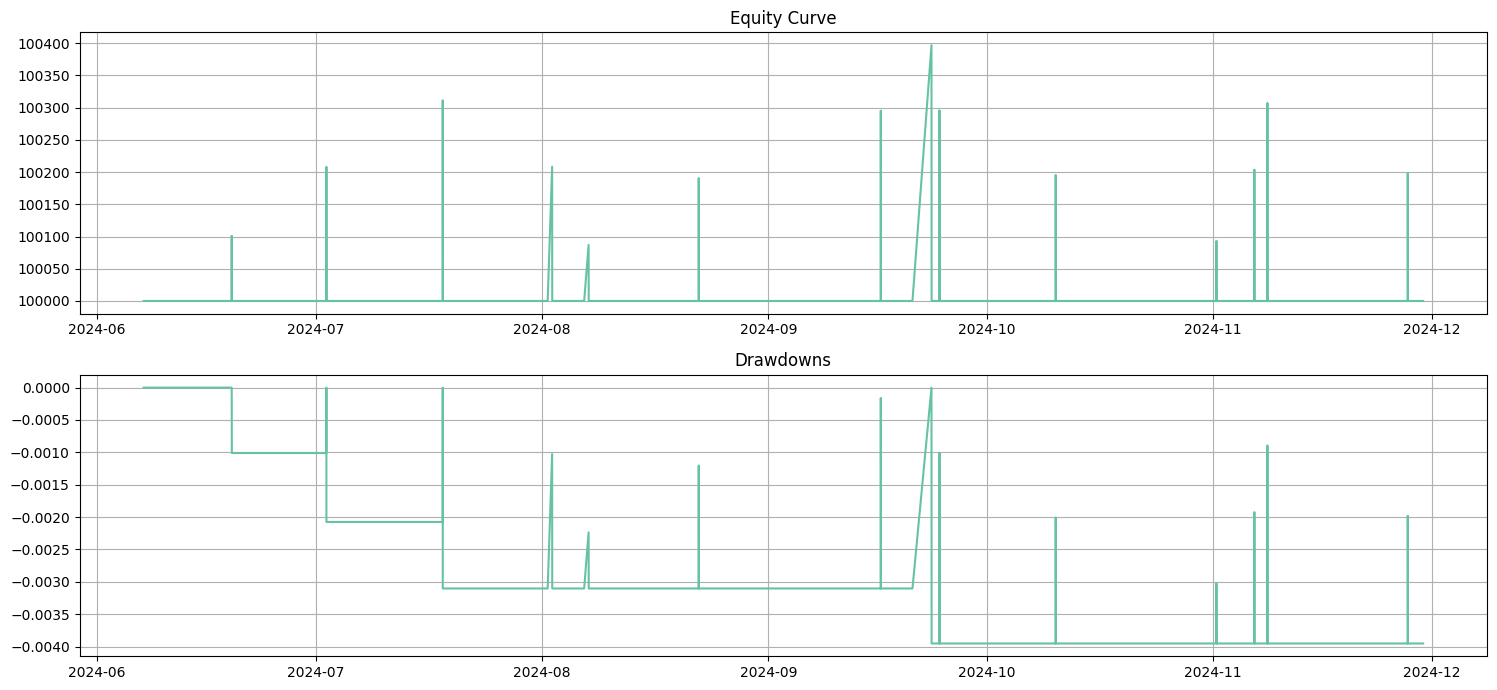

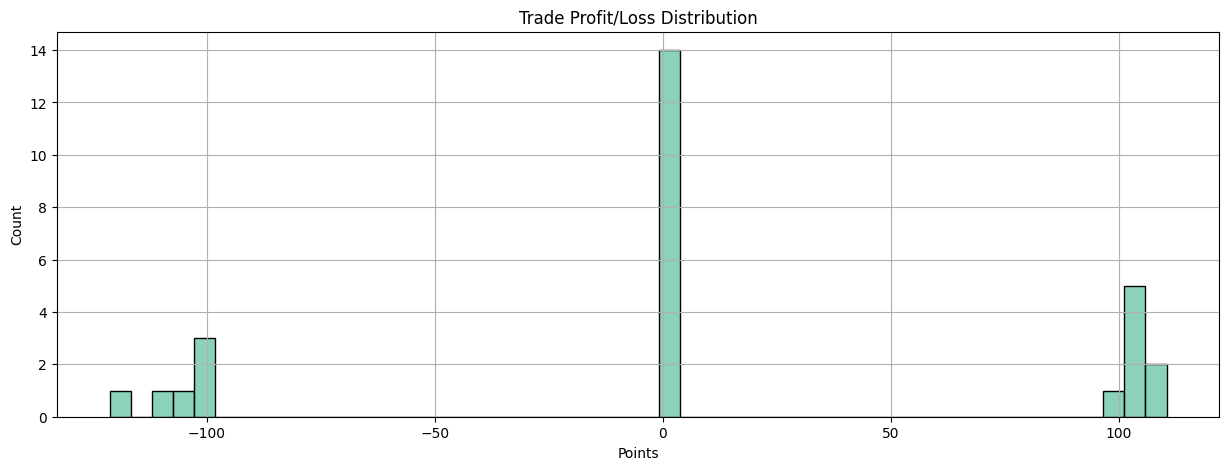


Trade Statistics:
Average Trade: 7.08
Std Dev: 75.45
Best Trade: 110.44
Worst Trade: -121.24


In [3]:
# Generate detailed performance report
report = analyzer.generate_report(results)
print(report)

# Plot equity curve and drawdowns
analyzer.plot_equity_curve(results)

def plot_trade_distribution(results):
    """Plot distribution of trade profits/losses."""
    trades = results[results['trade_executed']]['profit']
    
    plt.figure(figsize=(15, 5))
    sns.histplot(trades, bins=50)
    plt.title('Trade Profit/Loss Distribution')
    plt.xlabel('Points')
    plt.grid(True)
    plt.show()
    
    print("\nTrade Statistics:")
    print(f"Average Trade: {trades.mean():.2f}")
    print(f"Std Dev: {trades.std():.2f}")
    print(f"Best Trade: {trades.max():.2f}")
    print(f"Worst Trade: {trades.min():.2f}")

plot_trade_distribution(results)

## 3. Parameter Optimization

In [ ]:
def optimize_parameters(start_date, end_date):
    """Grid search for optimal parameters."""
    # Parameter ranges
    rsi_periods = [9, 14, 21]
    ma_fast_periods = [5, 9, 13]
    ma_slow_periods = [21, 34, 55]
    stop_losses = [50, 100, 150]
    take_profits = [100, 200, 300]
    
    results = []

    db_path = "../src/data/database/candles.db" 
    
    # Grid search
    for params in product(rsi_periods, ma_fast_periods, ma_slow_periods, stop_losses, take_profits):
        rsi, ma_fast, ma_slow, sl, tp = params
        
        # Initialize strategy with parameters
        coord = StrategyCoordinator(
            initial_balance=100000,
            max_position=1,
            stop_loss=sl,
            take_profit=tp,
            db_path=db_path
        )
        
        # Run backtest
        backtest_results = coord.backtest(
            start_date=start_date,
            end_date=end_date,
            interval=5
        )
        
        # Calculate metrics
        metrics = analyzer.calculate_metrics(backtest_results)
        
        results.append({
            'rsi_period': rsi,
            'ma_fast': ma_fast,
            'ma_slow': ma_slow,
            'stop_loss': sl,
            'take_profit': tp,
            'total_profit': metrics['total_profit'],
            'win_rate': metrics['win_rate'],
            'sharpe_ratio': metrics['sharpe_ratio'],
            'max_drawdown': metrics['max_drawdown']
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Run optimization
end_date = datetime.now()
start_date = end_date - timedelta(days=90)  # 3 months for optimization
    
optimization_results = optimize_parameters(
    start_date=start_date.strftime('%Y-%m-%d'),
    end_date=end_date.strftime('%Y-%m-%d')
)
    
# Show top 10 parameter combinations
print("Top 10 Parameter Combinations by Total Profit:")
print(optimization_results.sort_values('total_profit', ascending=False).head(10))

2024-12-04 09:57:31.146 | INFO     | src.analysis.technical.strategy:__init__:25 - Initialized TechnicalStrategy with RSI=14, MA_Fast=9, MA_Slow=21
2024-12-04 09:57:31.148 | INFO     | src.agents.market:__init__:31 - Initialized MarketAgent with balance=100000
2024-12-04 09:57:31.149 | INFO     | src.agents.coordinator:__init__:40 - Initialized StrategyCoordinator
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:88: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['open'] = df['open'].resample(rule).first()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:89: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['high'] = df['high'].resample(rule).max()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:90: FutureWarning: 'T' is 

Top 10 Parameter Combinations by Total Profit:
     rsi_period  ma_fast  ma_slow  stop_loss  take_profit  total_profit  \
121          14        9       34        100          200       -199.21   
78            9       13       55        150          100       -199.21   
94           14        5       34        100          200       -199.21   
93           14        5       34        100          100       -199.21   
167          21        5       21        100          300       -199.21   
168          21        5       21        150          100       -199.21   
174          21        5       34        100          100       -199.21   
87           14        5       21        150          100       -199.21   
86           14        5       21        100          300       -199.21   
85           14        5       21        100          200       -199.21   

     win_rate  sharpe_ratio  max_drawdown  
121    0.1875    -14.772325     -0.003041  
78     0.1875    -14.772325     -0.0030

## 4. Analysis of Optimal Parameters

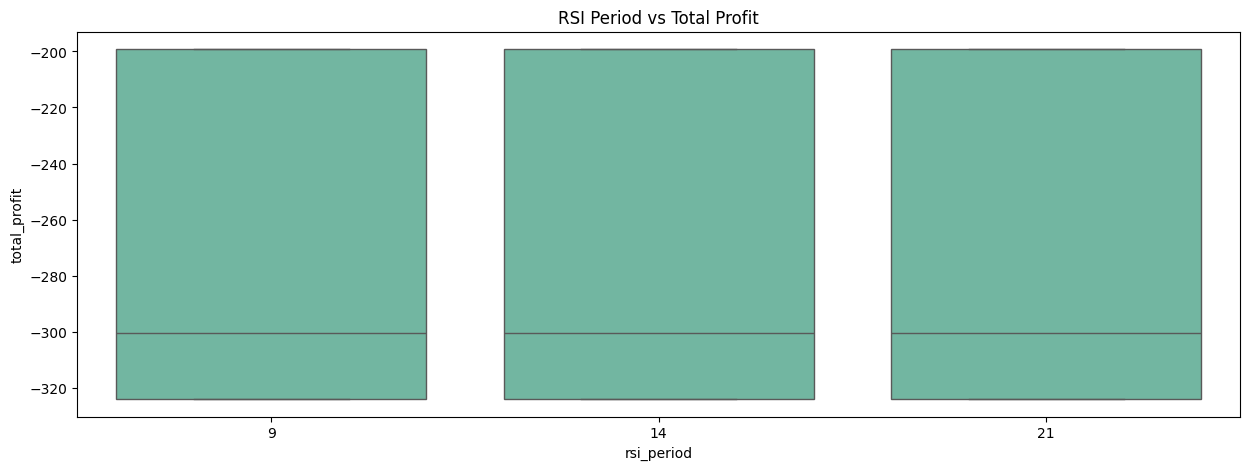

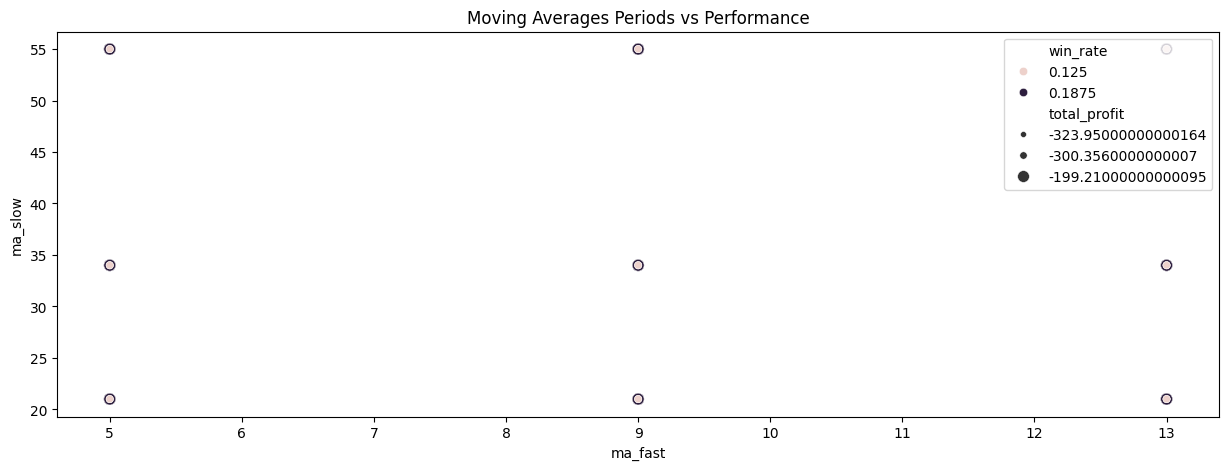

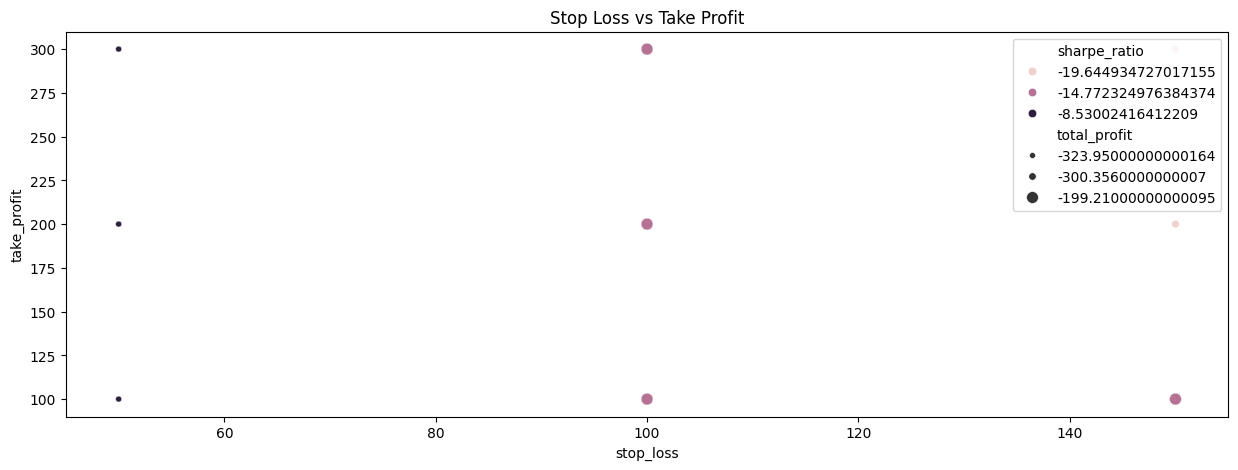


Best Parameters:
RSI Period: 9.0
Fast MA: 5.0
Slow MA: 21.0
Stop Loss: 100.0
Take Profit: 100.0


In [10]:
def analyze_parameter_impact(results_df):
    """Analyze the impact of different parameters on performance."""
    # RSI Period Analysis
    plt.figure(figsize=(15, 5))
    sns.boxplot(x='rsi_period', y='total_profit', data=results_df)
    plt.title('RSI Period vs Total Profit')
    plt.show()
    
    # Moving Averages Analysis
    plt.figure(figsize=(15, 5))
    sns.scatterplot(x='ma_fast', y='ma_slow', size='total_profit', 
                    hue='win_rate', data=results_df)
    plt.title('Moving Averages Periods vs Performance')
    plt.show()
    
    # Stop Loss and Take Profit Analysis
    plt.figure(figsize=(15, 5))
    sns.scatterplot(x='stop_loss', y='take_profit', size='total_profit',
                    hue='sharpe_ratio', data=results_df)
    plt.title('Stop Loss vs Take Profit')
    plt.show()

# Analyze parameter impact
analyze_parameter_impact(optimization_results)

# Get best parameters
best_params = optimization_results.loc[optimization_results['total_profit'].idxmax()]
print("\nBest Parameters:")
print(f"RSI Period: {best_params['rsi_period']}")
print(f"Fast MA: {best_params['ma_fast']}")
print(f"Slow MA: {best_params['ma_slow']}")
print(f"Stop Loss: {best_params['stop_loss']}")
print(f"Take Profit: {best_params['take_profit']}")

## 5. Out-of-Sample Testing

2024-12-04 10:40:20.196 | INFO     | src.analysis.technical.strategy:__init__:25 - Initialized TechnicalStrategy with RSI=14, MA_Fast=9, MA_Slow=21
2024-12-04 10:40:20.197 | INFO     | src.agents.market:__init__:31 - Initialized MarketAgent with balance=100000
2024-12-04 10:40:20.198 | INFO     | src.agents.coordinator:__init__:40 - Initialized StrategyCoordinator
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:88: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['open'] = df['open'].resample(rule).first()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:89: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['high'] = df['high'].resample(rule).max()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:90: FutureWarning: 'T' is 


Out-of-Sample Performance:
total_trades: 6.00
winning_trades: 2.00
losing_trades: 1.00
win_rate: 0.33
total_profit: 104.92
average_profit: 17.49
profit_std: 81.14
max_profit: 110.44
max_loss: -108.93
sharpe_ratio: -15.38
max_drawdown: -0.00


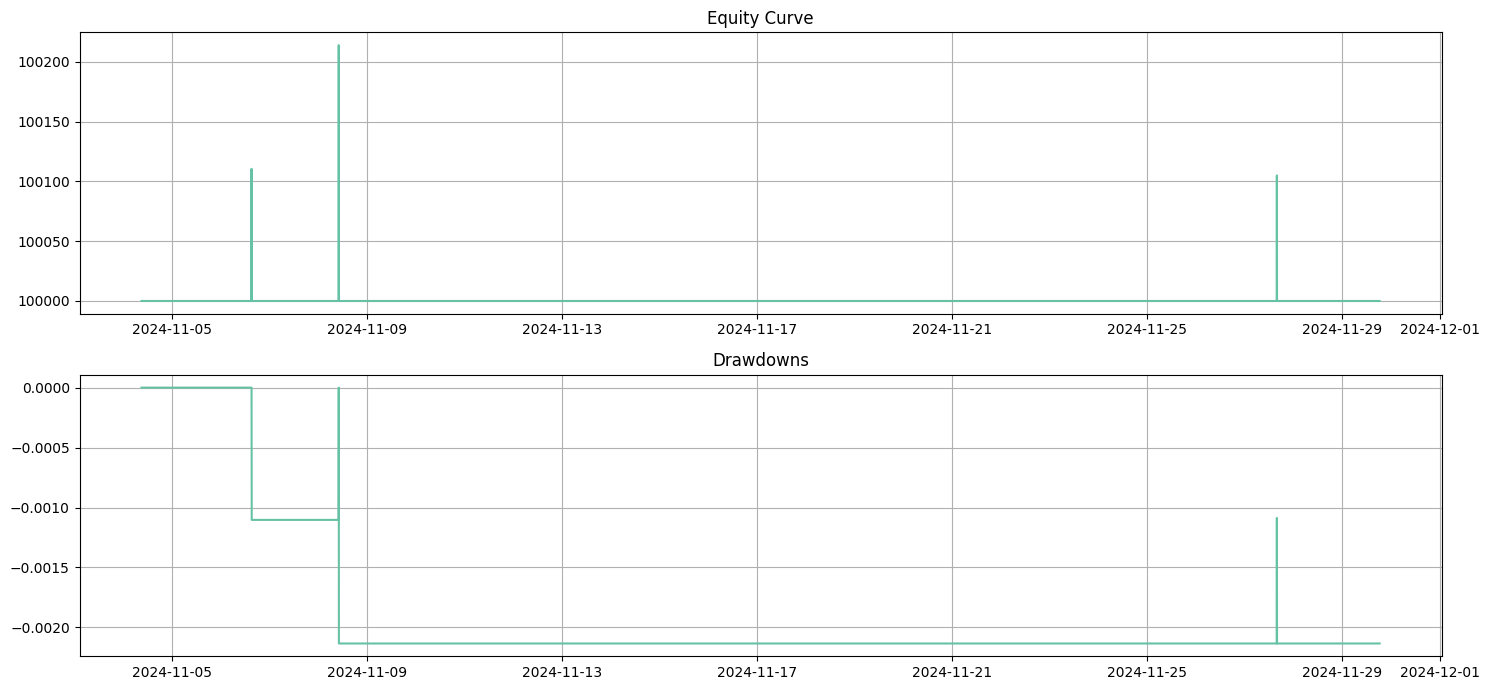

In [13]:
db_path = "../src/data/database/candles.db" 

# Test optimized strategy on recent data
coordinator_optimized = StrategyCoordinator(
    initial_balance=100000,
    max_position=1,
    stop_loss=best_params['stop_loss'],
    take_profit=best_params['take_profit'],
    db_path=db_path
)

# Run backtest on recent data
end_date = datetime.now()
start_date = end_date - timedelta(days=30)  # Last month

recent_results = coordinator_optimized.backtest(
    start_date=start_date.strftime('%Y-%m-%d'),
    end_date=end_date.strftime('%Y-%m-%d'),
    interval=5
)

# Calculate and show performance
recent_metrics = analyzer.calculate_metrics(recent_results)
print("\nOut-of-Sample Performance:")
for metric, value in recent_metrics.items():
    print(f"{metric}: {value:.2f}")

# Plot equity curve
analyzer.plot_equity_curve(recent_results)